In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('diabetes (1).csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Location,Outcome
0,6,148,72.0,35,0,33.6,0.627,50,Bangalore,1
1,1,85,66.0,29,0,26.6,0.351,31,Delhi,0
2,8,183,64.0,0,0,23.3,0.672,32,Gujarat,1
3,1,89,66.0,23,94,28.1,0.167,21,Chennai,0
4,0,137,40.0,35,168,990.0,2.288,33,Bangalore,1


In [3]:
# Check the shape
df.shape

(768, 10)

In [4]:
# Checking any Duplicated data
df.duplicated().sum()

0

In [5]:
# Checking null values
df.isna().sum()/len(df)*100

Pregnancies                 0.000000
Glucose                     0.000000
BloodPressure               1.432292
SkinThickness               0.000000
Insulin                     0.000000
BMI                         2.473958
DiabetesPedigreeFunction    2.473958
Age                         0.000000
Location                    0.000000
Outcome                     0.000000
dtype: float64

In [6]:
df.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure               float64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Location                     object
Outcome                       int64
dtype: object

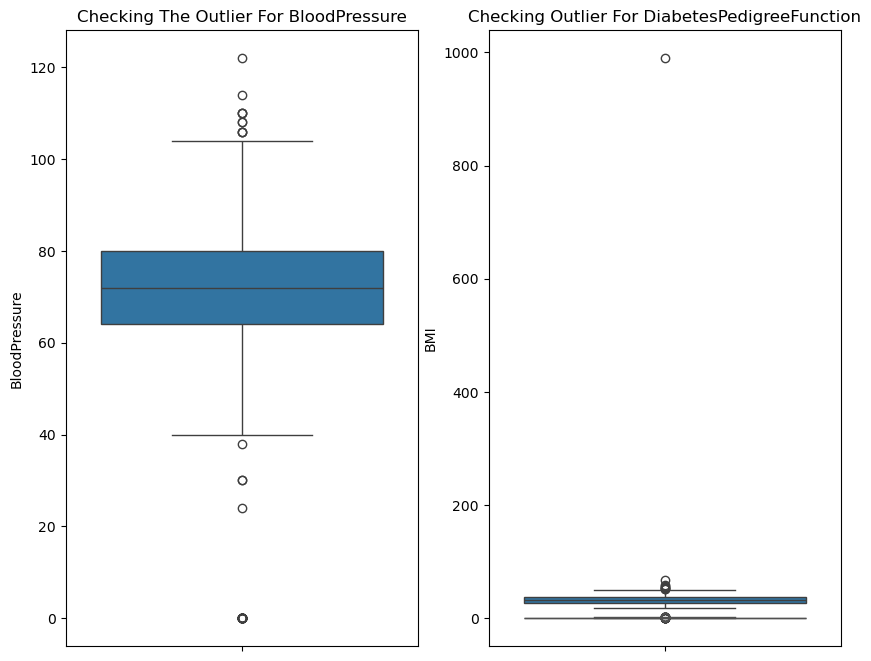

In [7]:
# Checking outliers before filling the null values
plt.figure(figsize=(10,8))
plt.subplot(1,2,1)
plt.title("Checking The Outlier For BloodPressure")
sns.boxplot(df['BloodPressure'])

plt.subplot(1,2,2)
plt.title("Checking Outlier For BMI")
sns.boxplot(df['BMI'])



plt.title("Checking Outlier For DiabetesPedigreeFunction")
sns.boxplot(df['DiabetesPedigreeFunction'])

plt.show()

In [8]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,757.000000,768.000000,768.000000,749.000000,749.000000,768.000000,768.000000
mean,3.845052,121.805990,69.227213,20.536458,79.799479,33.221362,0.472425,33.240885,0.348958
std,3.369578,39.774037,19.104313,15.952218,115.244002,35.887790,0.332623,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,64.000000,0.000000,0.000000,27.300000,0.240000,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.370000,29.000000,0.000000
75%,6.000000,141.000000,80.000000,32.000000,127.250000,36.500000,0.630000,41.000000,1.000000
max,17.000000,778.000000,122.000000,99.000000,846.000000,990.000000,2.420000,81.000000,1.000000


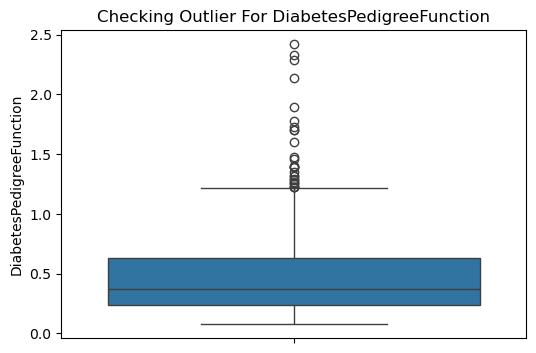

In [15]:
plt.figure(figsize=(6,4))
plt.title("Checking Outlier For DiabetesPedigreeFunction")
sns.boxplot(df['DiabetesPedigreeFunction'])

plt.show()

In [19]:
# Here we can see Outliers Saw we fill the data with median
df['BloodPressure'] = df['BloodPressure'].fillna(df['BloodPressure'].median())
df['BMI'] = df['BMI'].fillna(df['BMI'].median())
df['DiabetesPedigreeFunction'] = df['DiabetesPedigreeFunction'].fillna(df['DiabetesPedigreeFunction'].median())

In [21]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Location                    0
Outcome                     0
dtype: int64

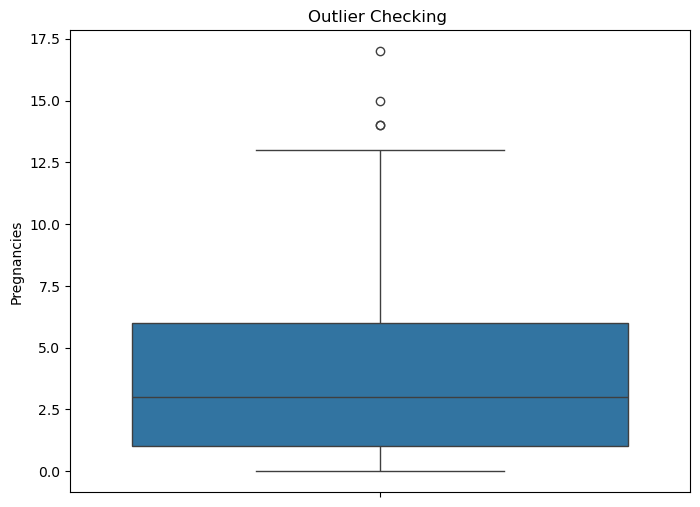

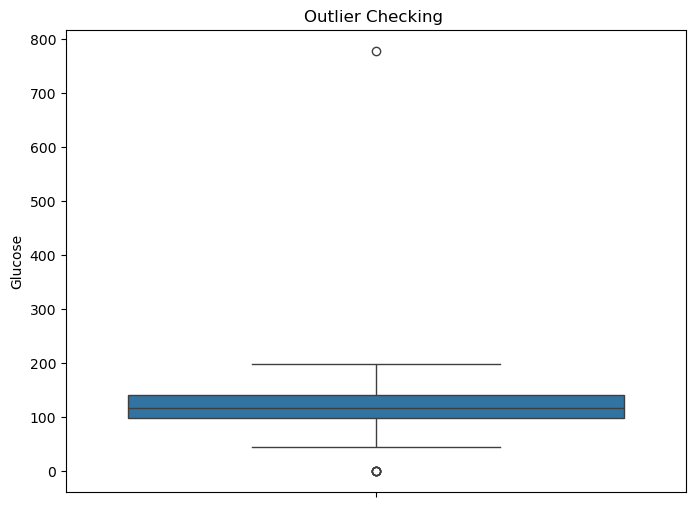

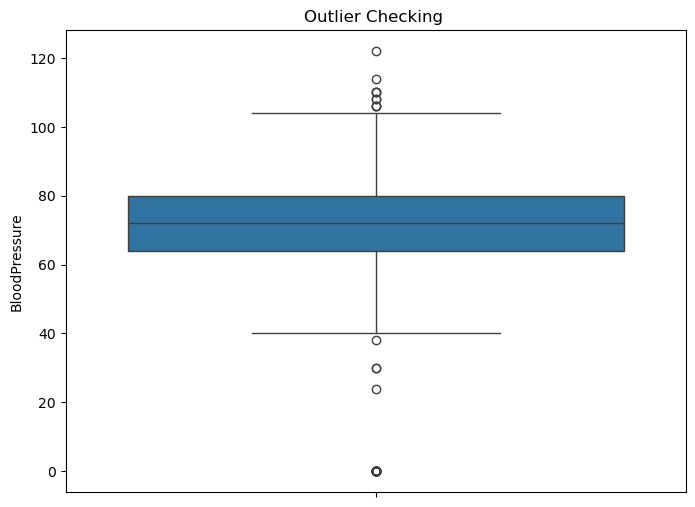

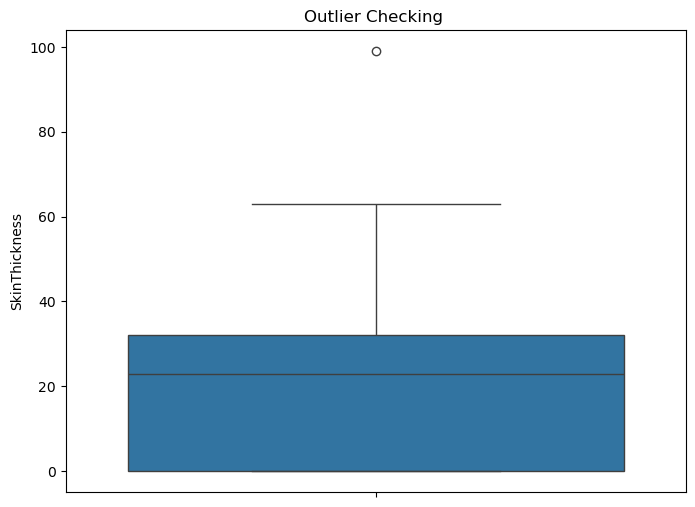

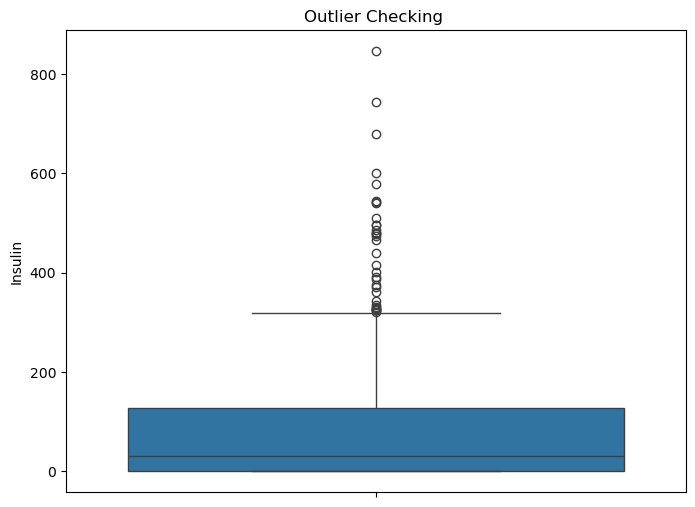

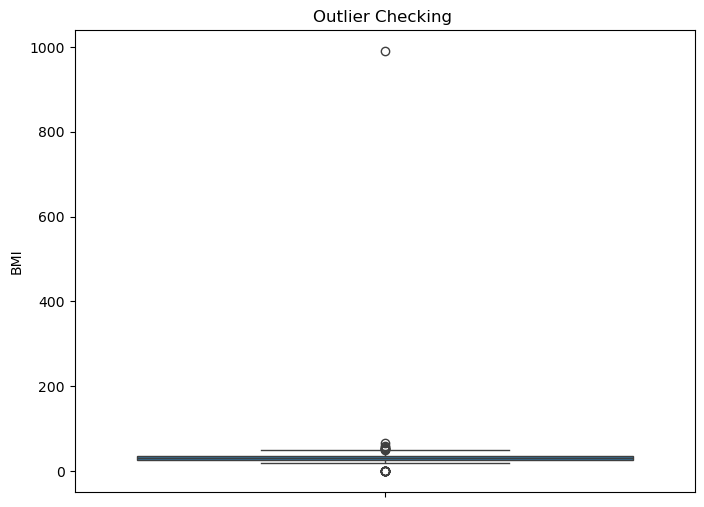

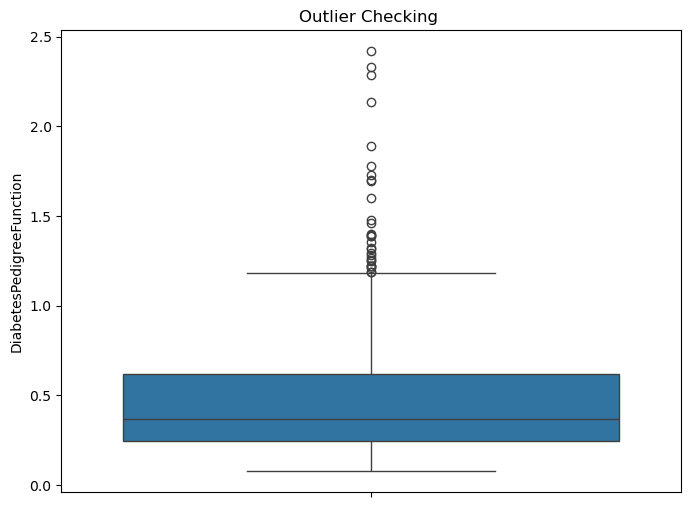

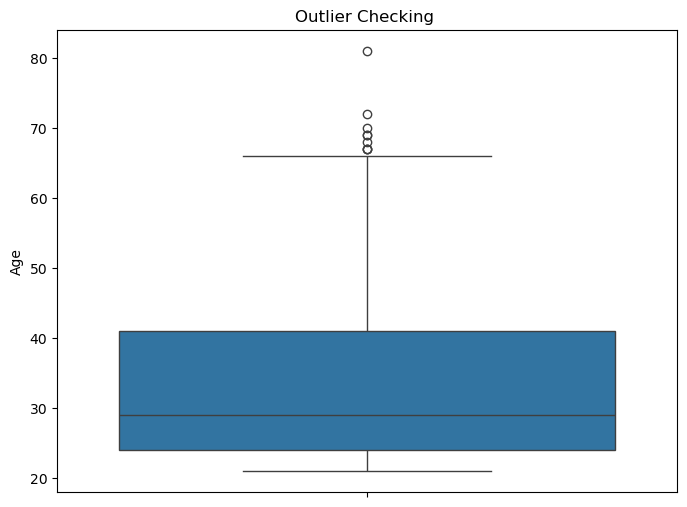

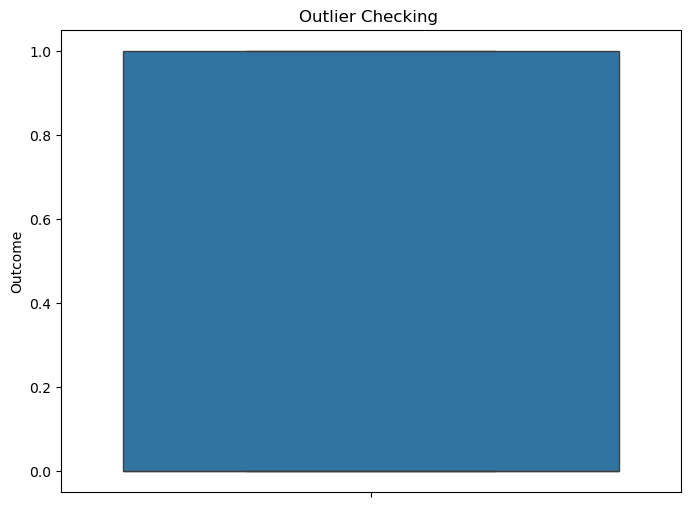

In [23]:
Neumeric_cols = df.select_dtypes(include=['int64','float64'])
for i in Neumeric_cols:
    plt.figure(figsize=(8,6))
    plt.title("Outlier Checking ")
    sns.boxplot(df[i])
    plt.show()

In [25]:
# Handling the Outlier
#using Zscore
Neumeric_cols['BloodPressure'].mean()

69.26692708333333

In [27]:
df['BloodPressure'].min()

0.0

In [29]:
df['BloodPressure'].max()

122.0

In [31]:
df['BloodPressure'].std()

18.969689675871056

In [33]:
upper_limit = df['BloodPressure'].mean() + 3*df['BloodPressure'].std()
lower_limit = df['BloodPressure'].mean() - 3*df['BloodPressure'].std()


In [35]:
upper_limit

126.1759961109465

In [37]:
lower_limit

12.357858055720158

In [39]:
df[(df['BloodPressure'] > 126.17) | (df['BloodPressure'] < 12.35)]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Location,Outcome
49,7,105,0.0,0,0,0.0,0.305,24,Delhi,0
60,2,84,0.0,0,0,0.0,0.304,21,Gujarat,0
78,0,131,0.0,0,0,43.2,0.270,26,Bangalore,1
81,2,74,0.0,0,0,0.0,0.102,22,Chennai,0
172,2,87,0.0,23,0,28.9,0.773,25,Bangalore,0
193,11,135,0.0,0,0,52.3,0.578,40,Bangalore,1
222,7,119,0.0,0,0,25.2,0.209,37,Bangalore,0
261,3,141,0.0,0,0,30.0,0.761,27,Chennai,1
266,0,138,0.0,0,0,36.3,0.933,25,Chennai,1
269,2,146,0.0,0,0,27.5,0.240,28,Delhi,1


In [41]:
df['BloodPressure'] = np.where(df['BloodPressure'] > upper_limit,upper_limit,
                              df['BloodPressure'])

In [43]:
df['BloodPressure'].describe()

count    768.000000
mean      69.266927
std       18.969690
min        0.000000
25%       64.000000
50%       72.000000
75%       80.000000
max      122.000000
Name: BloodPressure, dtype: float64

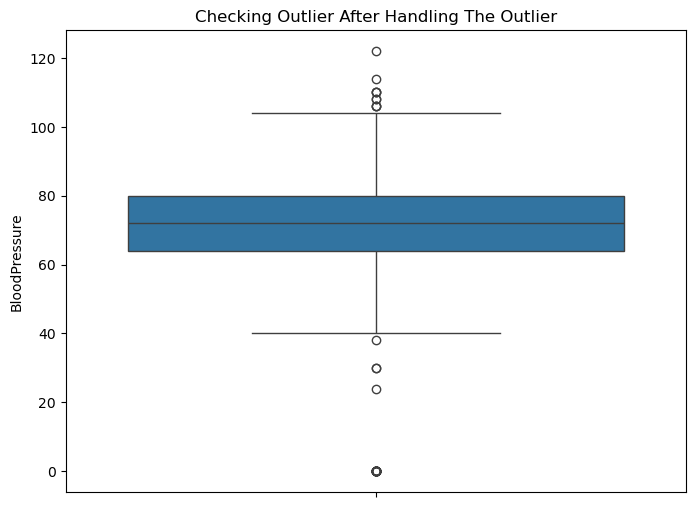

In [45]:
plt.figure(figsize=(8,6))
plt.title("Checking Outlier After Handling The Outlier")
sns.boxplot(df['BloodPressure'])
plt.show()

In [47]:
# For cgpa
Q1 = np.percentile(df['BloodPressure'], 25)
Q3 = np.percentile(df['BloodPressure'], 75)
IQR = Q3 - Q1


In [49]:
pos_outlier = Q3+1.5*IQR
neg_outlier = Q3-1.5*IQR

In [55]:
df['BloodPressure'] = np.where(df['BloodPressure'] > pos_outlier,pos_outlier,
                              np.where(df['BloodPressure'] < neg_outlier,neg_outlier,df['BloodPressure']))

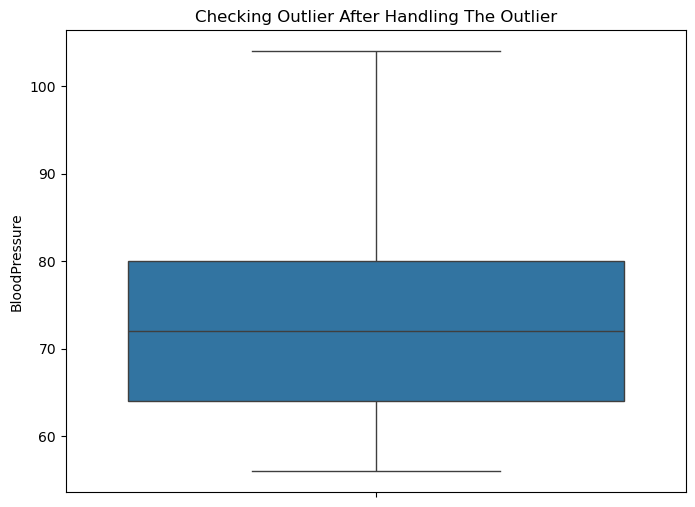

In [57]:
plt.figure(figsize=(8,6))
plt.title("Checking Outlier After Handling The Outlier")
sns.boxplot(df['BloodPressure'])
plt.show()

In [61]:
# For cgpa
Q1 = np.percentile(df['Pregnancies'], 25)
Q3 = np.percentile(df['Pregnancies'], 75)
IQR = Q3 - Q1


In [63]:
positive_outlier = Q3+1.5*IQR
negative_outlier = Q3-1.5*IQR


In [65]:
df['Pregnancies'] = np.where(df['Pregnancies'] > positive_outlier,positive_outlier,
                            np.where(df['Pregnancies'] < negative_outlier,negative_outlier,df['Pregnancies']))

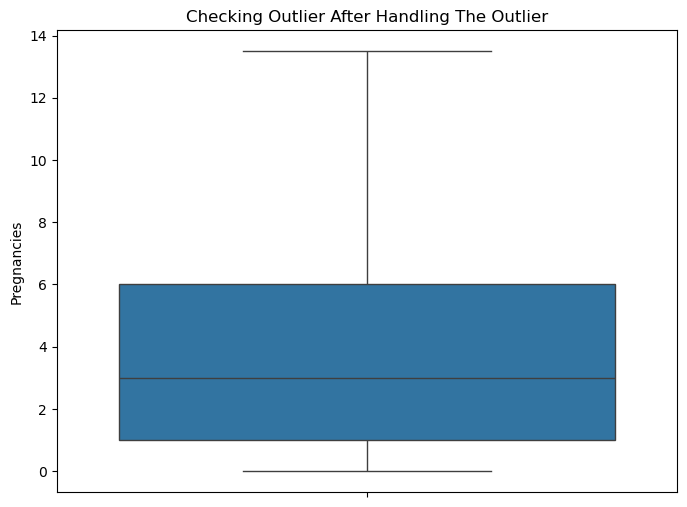

In [67]:
plt.figure(figsize=(8,6))
plt.title("Checking Outlier After Handling The Outlier")
sns.boxplot(df['Pregnancies'])
plt.show()

In [69]:
Q1 = np.percentile(df['Glucose'],25)
Q3 = np.percentile(df['Glucose'],75)
IQR = Q3 - Q1

In [71]:
upper = Q3+1.5*IQR
lower = Q1-1.5*IQR